In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [8]:
data['Education Level'] = data['Education Level'].replace(
    {
        "Bachelor's" : "bachelors",
        "Bachelor's Degree" : "bachelors",
         "Master's" : "masters",
        "Master's Degree" : "masters",
         'PhD': "phd",
        'phD': "phd"     
        
    }
)

In [9]:
data['Education Level'].unique()

array(['bachelors', 'masters', 'phd', 'High School'], dtype=object)

In [10]:
data['Education Level'] = data['Education Level'].map({
   'High School':1,

   "bachelors":2,
   "masters":3,
   "phd":4
})



In [12]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,2,Software Engineer,5.0,90000.0
1,28.0,Female,3,Data Analyst,3.0,65000.0
2,45.0,Male,4,Senior Manager,15.0,150000.0
3,36.0,Female,2,Sales Associate,7.0,60000.0
4,52.0,Male,3,Director,20.0,200000.0


In [13]:
x= data[['Age','Education Level','Years of Experience']] #for independent variable create data frame
y= data.Salary

In [28]:
x.shape

(6698, 3)

In [29]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linmodel = LinearRegression()
linmodel.fit(x,y)

LinearRegression()

In [32]:
linmodel.predict([[35,3,5]])

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92875.8220435])

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [35]:
xtrain

,Age,Education Level,Years of Experience
1939,42.0,3,13.0
2532,38.0,3,13.0
4553,27.0,2,2.0
2202,34.0,3,9.0
1640,56.0,4,17.0
...,...,...,...
623,27.0,2,4.0
2164,45.0,4,16.0
5071,36.0,2,11.0
2178,30.0,2,5.0


In [36]:
xtest

,Age,Education Level,Years of Experience
3970,31.0,2,6.0
4498,48.0,4,22.0
5591,34.0,4,11.0
2609,39.0,3,14.0
5666,27.0,2,3.0
...,...,...,...
5175,29.0,2,4.0
6081,27.0,2,3.0
5229,31.0,3,7.0
2534,23.0,1,2.0


In [38]:
linearmodel = LinearRegression()
linearmodel.fit(xtrain,ytrain)

LinearRegression()

In [39]:
linearmodel.predict([[38,3,7]])

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102704.6480934])

In [40]:
ytest

3970     75000.0
4498    219000.0
5591    170000.0
2609    135853.0
5666     80000.0
          ...   
5175     65000.0
6081     80000.0
5229    120000.0
2534     62852.0
2663     60000.0
Name: Salary, Length: 1340, dtype: float64

In [44]:
ypred = linearmodel.predict(xtest)
ypred

array([ 94531.97266197, 221098.77740194, 159819.04373489, ...,
       117929.42140117,  63517.18840522,  91459.06730776], shape=(1340,))

In [45]:
import numpy as np

In [47]:
mse = np.mean((ytest-ypred)**2)
mse

np.float64(869735404.4030486)

In [48]:
rmse= np.sqrt(mse)
rmse

np.float64(29491.27675098263)

In [50]:
import matplotlib.pyplot as plt

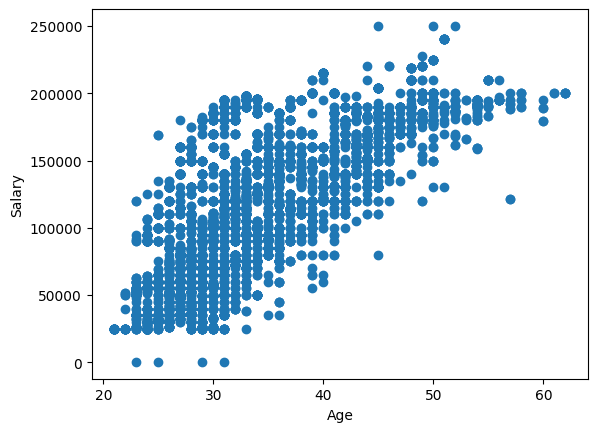

In [52]:
plt.scatter(data.Age,data.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [56]:
meanse =mean_squared_error(ytest,ypred)
meanse

869735404.4030486

In [58]:
map=mean_absolute_percentage_error(ytest,ypred)*100
map

46.77497988938144

In [24]:
linearmodel = LinearRegression()
linearmodel.fit(xtrain,ytrain)

LinearRegression()

In [25]:
datanew = pd.get_dummies(data,columns = ['Gender'],dtype=int)

In [29]:
datanew

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other
0,32.0,NaN,Software Engineer,5.0,90000.0,0,1,0
1,28.0,NaN,Data Analyst,3.0,65000.0,1,0,0
2,45.0,NaN,Senior Manager,15.0,150000.0,0,1,0
3,36.0,NaN,Sales Associate,7.0,60000.0,1,0,0
4,52.0,NaN,Director,20.0,200000.0,0,1,0
...,...,...,...,...,...,...,...,...
6699,49.0,NaN,Director of Marketing,20.0,200000.0,1,0,0
6700,32.0,NaN,Sales Associate,3.0,50000.0,0,1,0
6701,30.0,NaN,Financial Manager,4.0,55000.0,1,0,0
6702,46.0,NaN,Marketing Manager,14.0,140000.0,0,1,0
